# Prophet Multivariate

In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('variable_selected_county_dataset.csv')
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")

In [3]:
data['entity'].value_counts()

entity
California-Los Angeles       270
California-Orange            270
California-San Diego         270
Florida-Miami-Dade           270
Illinois-Cook                270
Nevada-Clark                 270
New York-Nassau              270
New York-New York City       270
New York-Suffolk             270
Pennsylvania-Philadelphia    270
Texas-Harris                 270
Texas-Tarrant                270
Name: count, dtype: int64

In [4]:
# Find the maximum date
max_date = data['date'].max()
min_date = data['date'].min()

max_date, min_date

(Timestamp('2020-12-04 00:00:00'), Timestamp('2020-03-10 00:00:00'))

In [12]:
# Split into training and testing 
train_dates = pd.date_range(start='2020-03-10', end='2020-10-25')
test_dates = pd.date_range(start='2020-10-26', end='2020-12-04')

train = pd.DataFrame(train_dates, columns=['date'])
test = pd.DataFrame(test_dates, columns=['date'])

train = pd.merge(train, data, on='date', how='left')
test = pd.merge(test, data, on='date', how='left')

train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
test['date'] = pd.to_datetime(test['date'], format="%Y-%m-%d")

### Plotting mean incremental cases for a given date

<Axes: xlabel='date', ylabel='incremental_cases'>

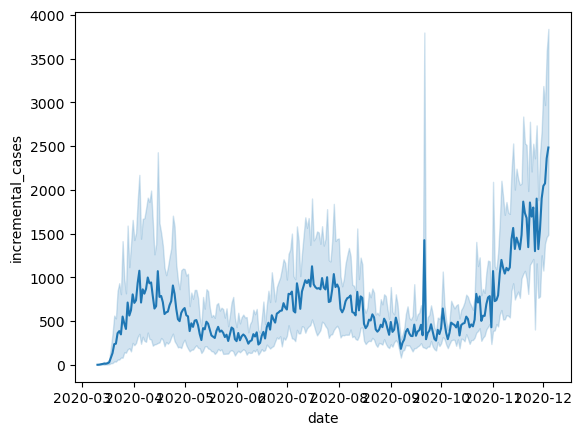

In [15]:
sns.lineplot(x="date", y="incremental_cases",legend = 'full' , data=data)

### Plotting mean incremental cases for a given date (test)

<Axes: xlabel='date', ylabel='incremental_cases'>

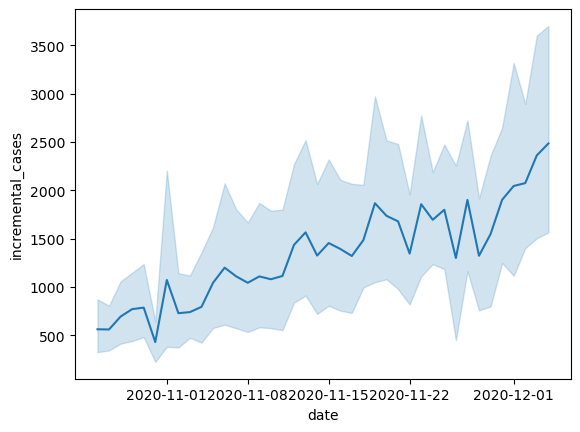

In [10]:
# Plotting actual test data
sns.lineplot(x="date", y="incremental_cases",legend = 'full' , data=test)

### Plotting mean incremental cases for a given date (train)

<Axes: xlabel='date', ylabel='incremental_cases'>

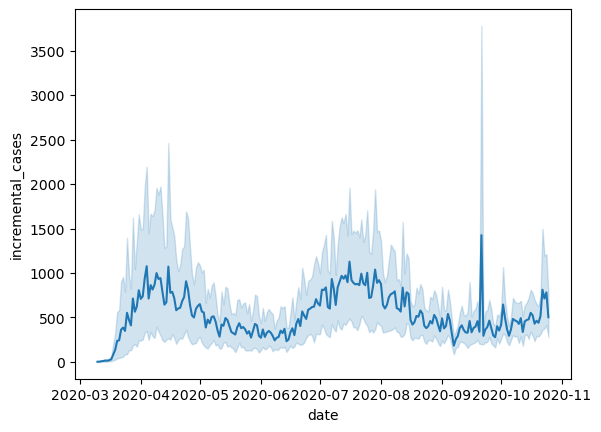

In [16]:
# Plotting actual test data
sns.lineplot(x="date", y="incremental_cases",legend = 'full' , data=train)